# Project: Investigate a Dataset - TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#func">Functions</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction:

### Dataset Description 

#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

>● The data set have 21 columns with multible information ranging from popularity to the cast and director of each movie.<br>
>● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.<br> 
>● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation.


## Questions Of The Analysis
<ul>
<li><a href="#Q1">How many movies were produced each year?</a></li>
<li><a href="#Q2">Which genres are most popular from year to year?</a></li>
<li><a href="#Q3">Who are the most profitable actors?</a></li>
<li><a href="#Q4">Who are the most profitable directors?</a></li>
<li><a href="#Q5">Which production company is the most profitable?</a></li>
<li><a href="#Q5">What is the correlation between profit, vote, and popularity?</a></li>
</ul>

<a id='wrangling'></a>
## Data Wrangling

> In this part i take a look at the data to get general view over the data set

In [32]:
#starting with importing the necessery liberaries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
#reading my csv file and viewing it's head values
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [34]:
#getting info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### Some of the info we got from that is most of the critical data to preform the analysis are complete,with some columns like(imdb_id,homepage,tagline,overview) are not really important right now so we will drop them in the data cleaning step ahead.

In [35]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [36]:
#viwing the shape of the data frame
df.shape

(10866, 21)

In [37]:
#number of duplicate rows
df.duplicated().sum()

1

In [38]:
#number of empty runtime cells (should be dropped for more accurate analysis)
df.query('runtime == 0')['runtime'].count()

31

In [39]:
#number of empty budget cells
df.query('budget_adj == 0')['budget_adj'].count()

5696

In [40]:
#number of empty revenue cells
df.query('revenue_adj == 0')['revenue_adj'].count()

6016

In [41]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10866, dtype: object

##### Columns for (cast,director, keywords, genres, production_companies) are in a string format so we need to convert that to a list to be able to preform the necessary analysis(

In [42]:
#checking for the number of null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='cleaning'></a>
## Data Cleaning

- I preformed the data cleanng process in 4 steps:

>1-Droping the unnecessery columns.<br>
>2-Droping the duplicate row.<br>
>3-Fixing release date format.<br>
>4-Droping any movie with a release date after 1-1-2016(to match the max value of release year)<br>


In [43]:
#copying my data frame into clean_df whch s the data frame i'll preform the cleaning on. 

clean_df = df.copy()

In [44]:
#deleting the unnecessery columns of (imdb_id,homepage,budget,revenue,tagline,overview).

clean_df.drop(['imdb_id','homepage','tagline','budget','revenue','overview'], axis=1, inplace=True)

In [45]:
#dropping duplicate rows.

clean_df.drop_duplicates(inplace=True)

In [46]:
#changing the release_date column format into DateTime format.

clean_df.release_date = pd.to_datetime(df.release_date)

In [47]:
#creating a new column for the profit by subtracting the values of revenue and budget columns

clean_df['profit'] = clean_df.revenue_adj - clean_df.budget_adj

In [48]:
#checking of the number of movies with a release date exceeding the year 2016

clean_df[clean_df.release_date >= pd.Timestamp(2016, 1, 1)].count()

id                      458
popularity              458
original_title          458
cast                    455
director                457
keywords                439
runtime                 458
genres                  457
production_companies    445
release_date            458
vote_count              458
vote_average            458
release_year            458
budget_adj              458
revenue_adj             458
profit                  458
dtype: int64

#### While cleaning the data i have noticed that the release date column has about 458 wrong values of movies having it's release date 100 years after it's release year, so i have tried to fix it but i couldn't overwrite the datetime value so i will ignore it for now and complete my analysis and come back later to give it anothor try.

In [49]:
#checking the info of the dataframe after the cleaning process

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   director              10821 non-null  object        
 5   keywords              9372 non-null   object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

<a id='func'></a>
## Functions

In this segment we build the functions we need for the analysis process.

In [50]:
#a function to count values in columns where values are seperated by '|' in the same cell of the dataframe

def column_count(df, col):
#args: 
    #df: Dataframe used to create visualization
    #col: column to investigate
    #return: the count of each value
    
    values = df[col].str.cat(sep='|')
    values_list = pd.Series(values.split(sep='|'))
    
    return values_list.value_counts(ascending=False)

In [51]:
# create a function to visualize variable of the data frame over years

def plot_over_yr(df, title, xlabel, ylabel):
#args: 
    #df: Dataframe used to create visualization
    #title: title of the plot
    #xlabel: xlabel of the plot
    #ylabel: ylabel of the plot
    #return: A bar diagram
    
    df.plot(kind='bar', figsize=(15,10), fontsize=14);
    plt.title(title, fontsize=18, fontweight='bold');
    plt.xlabel(xlabel, fontsize=16);
    plt.ylabel(ylabel, fontsize=16);

<a id='eda'></a>
# Data Analysis


### We start with a quick look at the histogram to see what our data looks like!

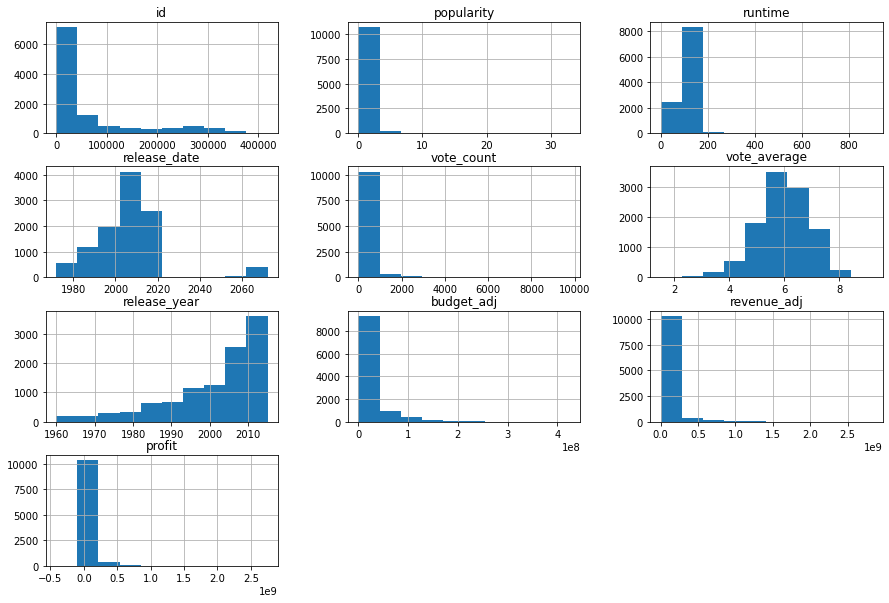

In [52]:
clean_df.hist(figsize=(15,10));

<a id='Q1'></a>
## Q1 : How many movies were produced each year?

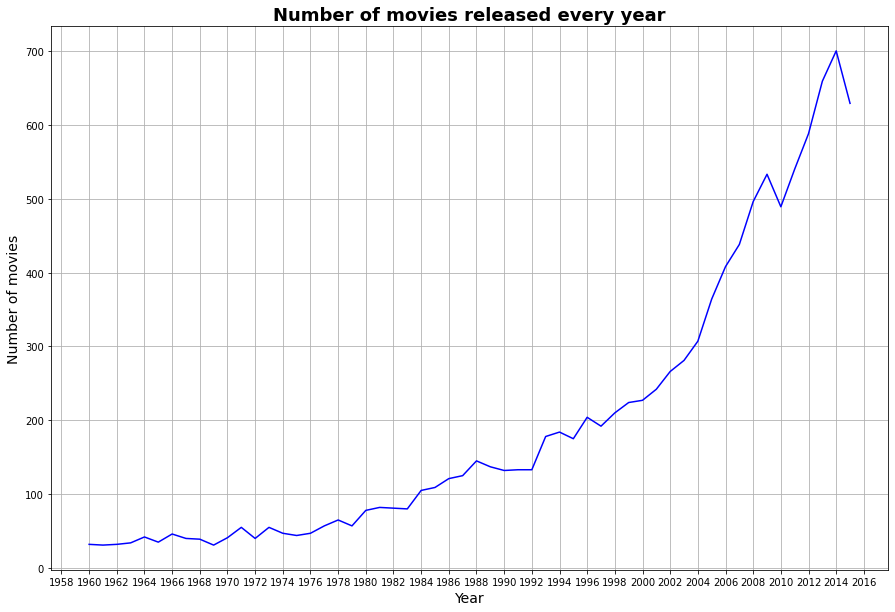

In [53]:
#getting the total movie count for each year and ploting it

movies_count = clean_df.groupby('release_year').count().id 
movies_count.plot(color='b', xticks=np.arange(1958, 2018, 2), figsize=(15, 10));
plt.title('Number of movies released every year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of movies',fontsize=14);
plt.grid()

###### The graph shows that the number of movies have been increasing over the years.

In [54]:
#concluding that the year with the most movies was 2014 and printing the number of movies

print('So the year with the most movies produced was 2014 with {} movies'.format(clean_df[clean_df.release_year == 2014].count().id))

So the year with the most movies produced was 2014 with 700 movies


<a id='Q2'></a>
## Q2 : Which genres are most popular from year to year?

#### To answer this question we need to build a seperate dataframe for genres count over the years and another dataframe of genres with highest popularity.

In [55]:
genres = column_count(df, 'genres')                #count the occurrence of each genre in the dataframe 
genres_count = []
for genre in genres.index:                         #appending the count of each genre to it's lable as a nested list
    genres_count.append([genre, genres[genre]])
    
genres_count.sort(key=lambda x:x[1], reverse=True) #sort in descending order
labels, counts = zip(*genres_count)                #upzip genres_count to get the genre labels
labels = list(labels)

genres_list = list(map(str, df.genres))            #take the values of genres column in the list
labels.append('nan')
years = np.array(df.release_year)                  #take the values of release year column in a numpy array
popularity = np.array(df.popularity)               #take the values of release year column in a numpy array

#create two new dataframe popularity_df and count_per_year and set the values of all cells to 0.0
popularity_df = pd.DataFrame(index=labels, columns=range(1960,2016))
count_per_year_df = pd.DataFrame(index=labels, columns=range(1960,2016))
popularity_df.fillna(value=0.0, inplace=True)
count_per_year_df.fillna(value=0.0, inplace=True)

#assigning the value to each genre in each data frame using a loop
yr = 0
for genre in genres_list:
    split_genre = list(map(str, genre.split('|')))
    popularity_df.loc[split_genre, years[yr]] = popularity_df.loc[split_genre, years[yr]] + popularity[yr]
    count_per_year_df.loc[split_genre, years[yr]] = count_per_year_df.loc[split_genre, years[yr]] + 1
    yr+=1

popularity_df = popularity_df/count_per_year_df    #devide the popularity dataframe to get an absolute value of each genres popularity

In [56]:
#viewing the new data frames heads

count_per_year_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Drama,13.0,16.0,21.0,13.0,20.0,20.0,16.0,16.0,20.0,13.0,...,197.0,197.0,233.0,224.0,211.0,214.0,232.0,253.0,284.0,260.0
Comedy,8.0,10.0,5.0,13.0,16.0,7.0,16.0,17.0,9.0,12.0,...,155.0,151.0,169.0,198.0,169.0,172.0,176.0,175.0,185.0,162.0
Thriller,6.0,0.0,7.0,10.0,9.0,11.0,8.0,5.0,5.0,3.0,...,114.0,125.0,127.0,157.0,135.0,146.0,160.0,175.0,179.0,171.0
Action,8.0,7.0,8.0,4.0,5.0,9.0,14.0,7.0,6.0,10.0,...,80.0,95.0,99.0,108.0,108.0,115.0,99.0,121.0,129.0,107.0
Romance,6.0,7.0,5.0,8.0,9.0,5.0,6.0,11.0,6.0,4.0,...,70.0,74.0,84.0,83.0,85.0,75.0,79.0,65.0,84.0,57.0


###### This is a data frame for the yearly count of each genre.

In [57]:
popularity_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Drama,0.566305,0.432233,0.392000,0.322448,0.364818,0.305288,0.339766,0.511467,0.377322,0.489887,...,0.555578,0.558097,0.531565,0.566505,0.586328,0.598544,0.605073,0.660076,0.867474,0.937877
Comedy,0.396000,0.679838,0.273183,0.444481,0.491229,0.358721,0.323658,0.434822,0.329548,0.270504,...,0.627083,0.525933,0.513957,0.560836,0.586035,0.670374,0.592222,0.603933,0.866663,0.938527
Thriller,0.811910,NaN,0.760582,0.719929,0.622580,0.343072,0.273869,0.701979,0.555919,0.871283,...,0.666437,0.736963,0.678792,0.653917,0.740660,0.794807,0.676846,0.734572,1.041924,1.401877
Action,0.590724,0.365913,0.708945,0.951729,0.813087,0.451373,0.263347,0.723570,0.365562,0.539976,...,0.753240,0.760570,0.894801,0.868464,0.932528,1.058096,1.131179,1.009001,1.682013,2.251415
Romance,0.541227,0.426036,0.365621,0.399573,0.221586,0.622780,0.351903,0.417445,0.260356,0.288267,...,0.611784,0.527323,0.649842,0.614246,0.633717,0.675694,0.657424,0.610802,0.629171,0.948865


###### This is a data frame for the yearly popularity of each genre.

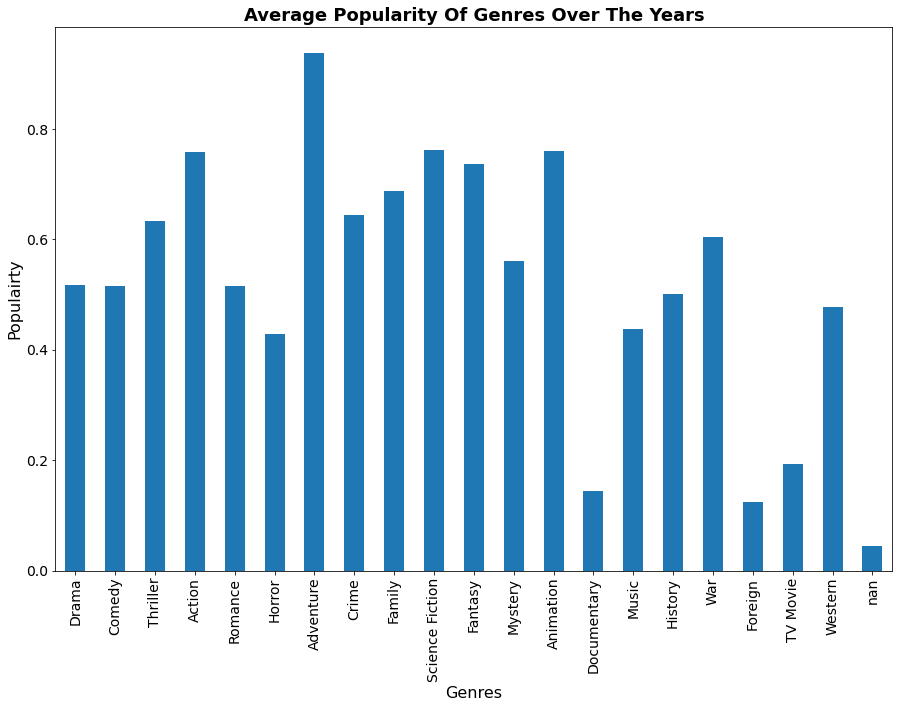

In [58]:
plot_df = popularity_df.sum(axis=1).divide(len(popularity_df.columns))
plot_over_yr(plot_df, 'Average Popularity Of Genres Over The Years', 'Genres', 'Populairty')

###### This graph shows the avarage popularity of each genre.
##### we can see that 'adventure, sci-fi, and action' genres have the highest popularity.

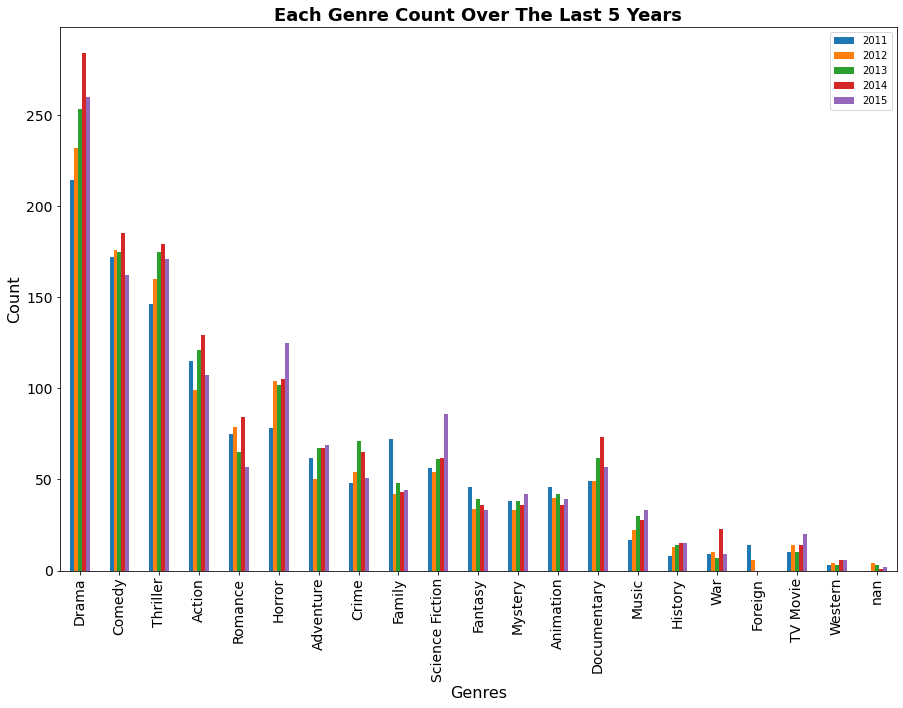

In [59]:
title = 'Each Genre Count Over The Last 5 Years'
xlabel = 'Genres'
ylabel = 'Count'
count_per_year_df.iloc[:, 51:].plot(kind='bar', figsize=(15,10), fontsize=14);
plt.title(title, fontsize=18, fontweight='bold');
plt.xlabel(xlabel, fontsize=16);
plt.ylabel(ylabel, fontsize=16);

###### This graph shows the count of each genre over the last 5 years.
###### We can clearly see that drama, comedy, and thriller genres have the highest number of movies.

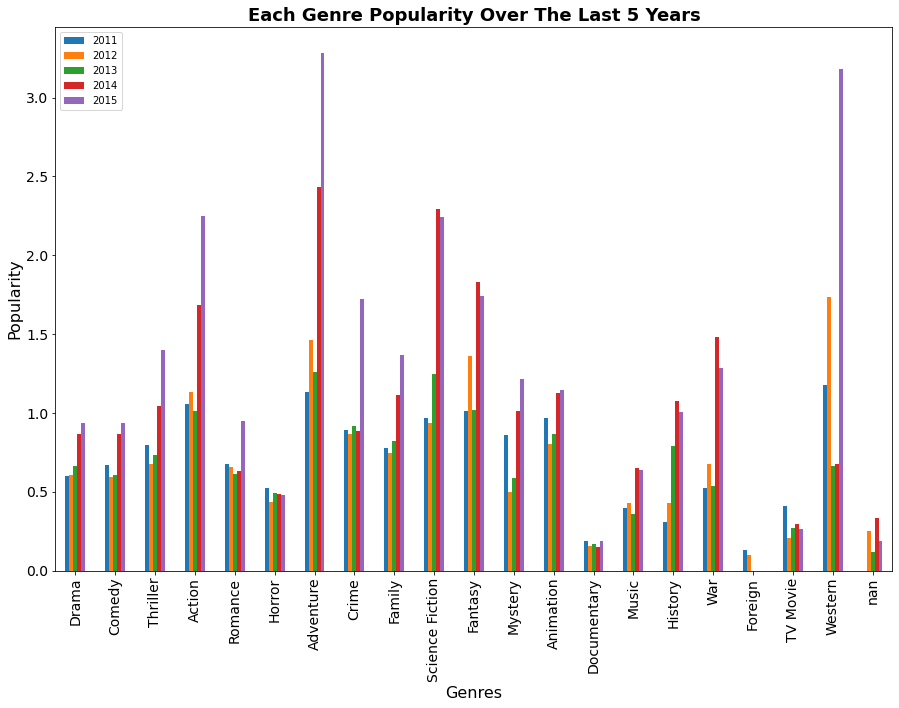

In [60]:
title = 'Each Genre Popularity Over The Last 5 Years'
xlabel = 'Genres'
ylabel = 'Popularity'
popularity_df.iloc[:, 51:].plot(kind='bar', figsize=(15,10), fontsize=14);
plt.title(title, fontsize=18, fontweight='bold');
plt.xlabel(xlabel, fontsize=16);
plt.ylabel(ylabel, fontsize=16);

###### This graph shows the popularity of each genre over the last 5 years.
###### The data shown here confirms our findings about the most popular genres. 

In [61]:
# fig, ax = plt.subplots(figsize=(13,13))
# ax.pie(counts, labels=labels, 
#       autopct=lambda x: '{:2.0f}%'.format(x) if x>1 else '',
#       shadow=False, startangle=0, colors=sns.color_palette('muted'), textprops={'fontsize': 14})
# plt.title(label='Percentage Of Each Genres Over The Years', fontsize=18, fontweight='bold');
# ax.axis('equal')
# plt.tight_layout()

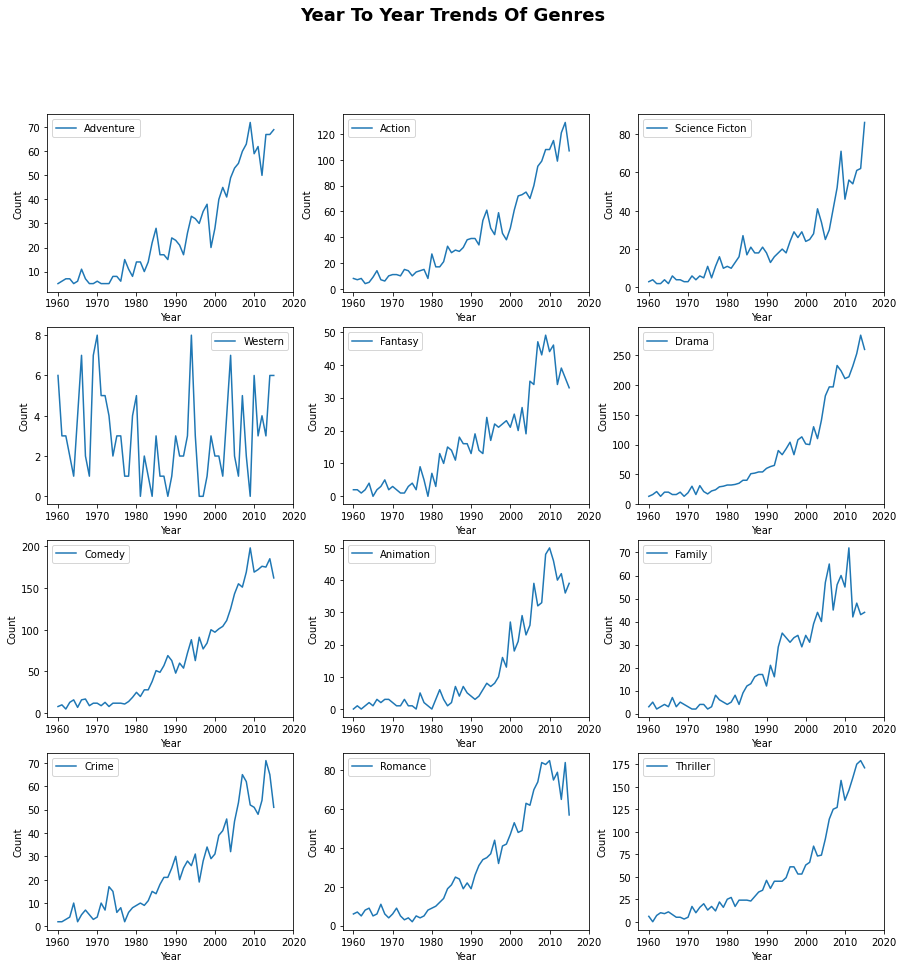

In [62]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
xtick = np.arange(1960, 2021, 10)
fig.suptitle('Year To Year Trends Of Genres', fontsize=18, fontweight='bold');

count_per_year_df.loc['Adventure'].plot(label='Adventure', ax=ax[0][0], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Action'].plot(label='Action', ax=ax[0][1], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Science Fiction'].plot(label='Science Ficton', ax=ax[0][2], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Western'].plot(label='Western', ax=ax[1][0], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Fantasy'].plot(label='Fantasy', ax=ax[1][1], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Drama'].plot(label='Drama', ax=ax[1][2], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Comedy'].plot(label='Comedy', ax=ax[2][0], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Animation'].plot(label='Animation', ax=ax[2][1], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Family'].plot(label='Family', ax=ax[2][2], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Crime'].plot(label='Crime', ax=ax[3][0], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Romance'].plot(label='Romance', ax=ax[3][1], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);
count_per_year_df.loc['Thriller'].plot(label='Thriller', ax=ax[3][2], xticks=xtick, xlabel='Year', ylabel='Count', legend=True);

##### These graphs show the numbers of movies produced for each genre over the years.
##### We can see that the number of movies are increasing for each genre, except for western despite having a higher than avarage popularity.

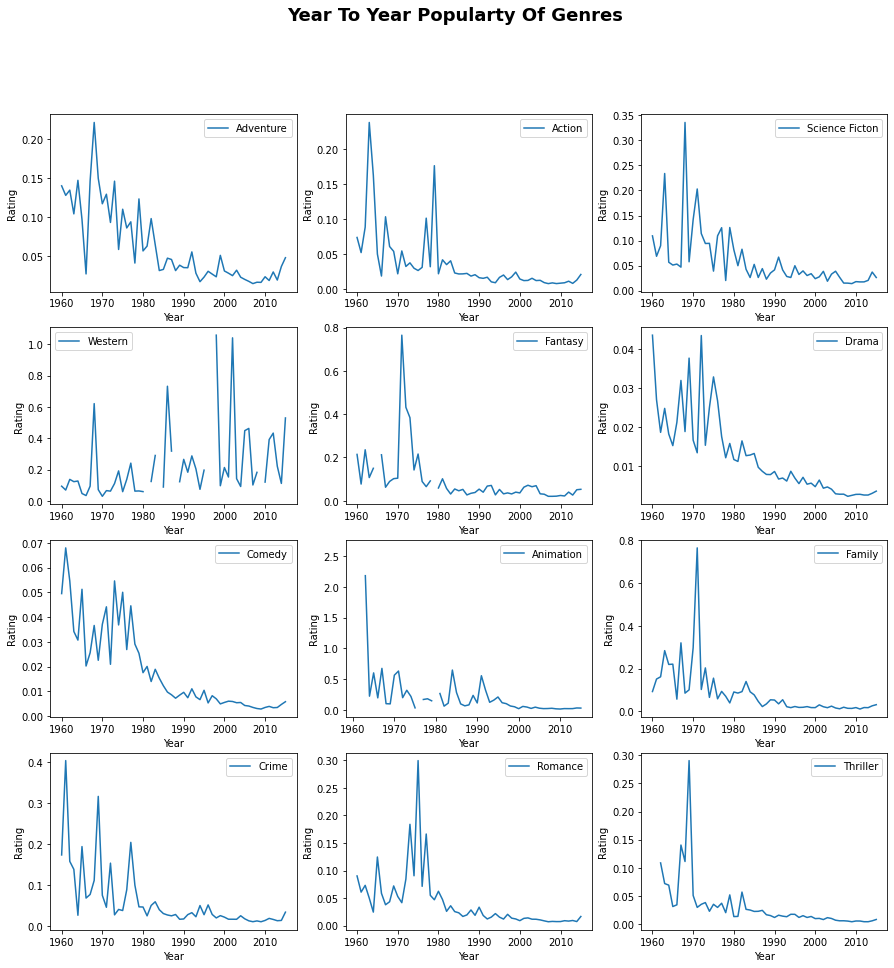

In [63]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Year To Year Popularty Of Genres', fontsize=18, fontweight='bold');
popular_genre_df = popularity_df.divide(count_per_year_df)

popular_genre_df.loc['Adventure'].plot(label='Adventure', ax=ax[0][0], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Action'].plot(label='Action', ax=ax[0][1], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Science Fiction'].plot(label='Science Ficton', ax=ax[0][2], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Western'].plot(label='Western', ax=ax[1][0], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Fantasy'].plot(label='Fantasy', ax=ax[1][1], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Drama'].plot(label='Drama', ax=ax[1][2], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Comedy'].plot(label='Comedy', ax=ax[2][0], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Animation'].plot(label='Animation', ax=ax[2][1], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Family'].plot(label='Family', ax=ax[2][2], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Crime'].plot(label='Crime', ax=ax[3][0], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Romance'].plot(label='Romance', ax=ax[3][1], xlabel='Year', ylabel='Rating', legend=True);
popular_genre_df.loc['Thriller'].plot(label='Thriller', ax=ax[3][2], xlabel='Year', ylabel='Rating', legend=True);

##### These graphs show the popularity of each genre over the years.

<a id='Q3'></a>
## Q3 : Who are the actors with the most movies produced? and who are the most profitable actors?

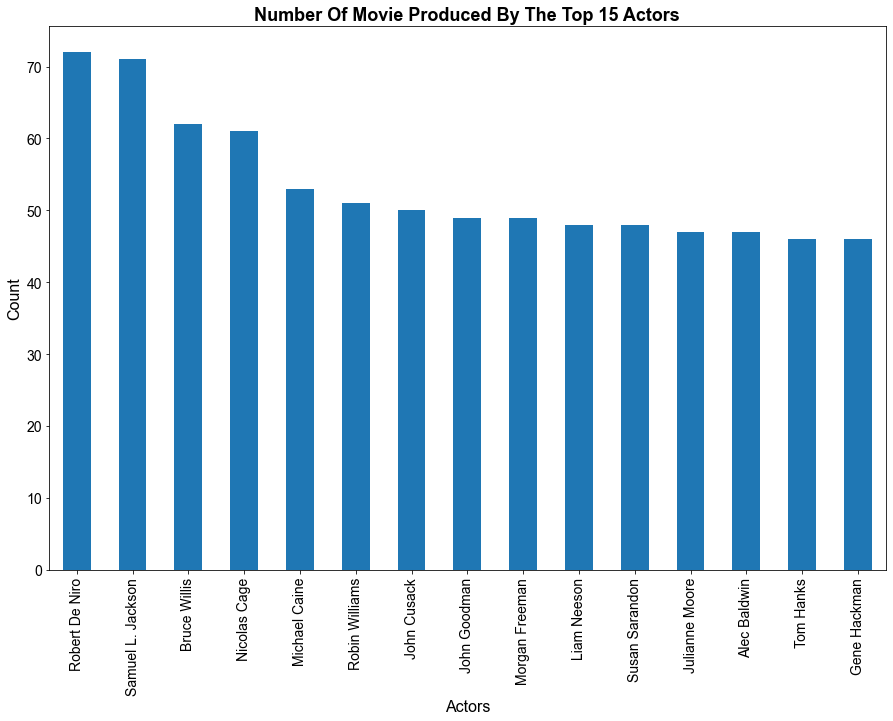

In [64]:
actor_count = column_count(clean_df, 'cast')

actor_count.iloc[:15].plot(kind='bar', fontsize=14, figsize=(15,10))
title = 'Number Of Movie Produced By The Top 15 Actors'
xlabel = 'Actors'
ylabel = 'Count'
sns.set_style('whitegrid')
plt.title(title, fontsize=18, fontweight='bold')
plt.xlabel(xlabel, fontsize=16)
plt.ylabel(ylabel, fontsize=16);

##### This graph shows the top fifteen most poductive actors and how many movies each one has made.

### To calculate actors with the most profit we need to repeat the steps made for genres question which is creating 2 dataframes, one for the profit and another for the count

In [65]:
#two new dataframe for profit and the cast count
casts = column_count(clean_df, 'cast')
cast = list(map(str, (clean_df.cast)))
cast_list = casts.index.to_list()
cast_list.append('nan')
profit = np.array(clean_df.profit)

#create two dataframe profit_df and cast_df
profit_df = pd.DataFrame(index=cast_list, columns=['Average Profit'])
cast_df = pd.DataFrame(index=cast_list, columns=['Average Profit'])
profit_df.fillna(value=0.0, inplace=True)
cast_df.fillna(value=0.0, inplace=True)

#assigning the value to each actor in each data frame using a loop
y=0
for actor in cast:
    split_cast = list(map(str, actor.split('|')))
    profit_df.loc[split_cast] = profit_df.loc[split_cast] + profit[y]
    cast_df.loc[split_cast] = cast_df.loc[split_cast] + 1
    y+=1

#dividing to get average profit per actor.
profit_actor_df = profit_df.divide(cast_df)
profit_actor_df.sort_values(by='Average Profit', ascending=False, inplace=True)

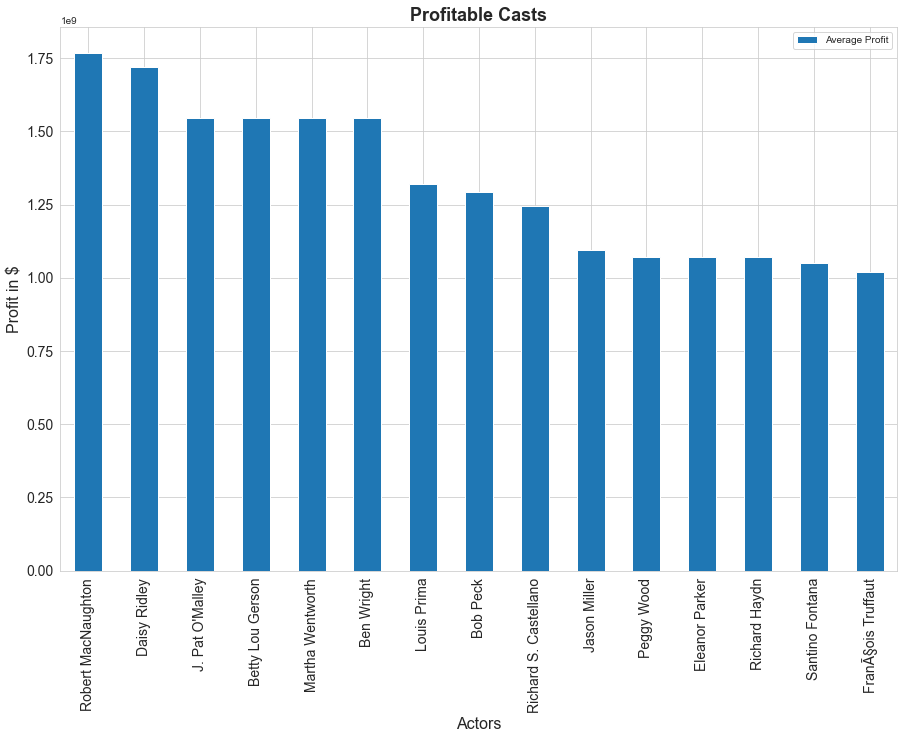

In [66]:
plot_over_yr(profit_actor_df.iloc[:15], 'Profitable Casts', 'Actors', 'Profit in $')

##### This graph shows the top fifteen most profitable actors and how much money each one made.

<a id='Q4'></a>
## Q4 : Who are the directors with the most movies produced? and who are the most profitable directors? 

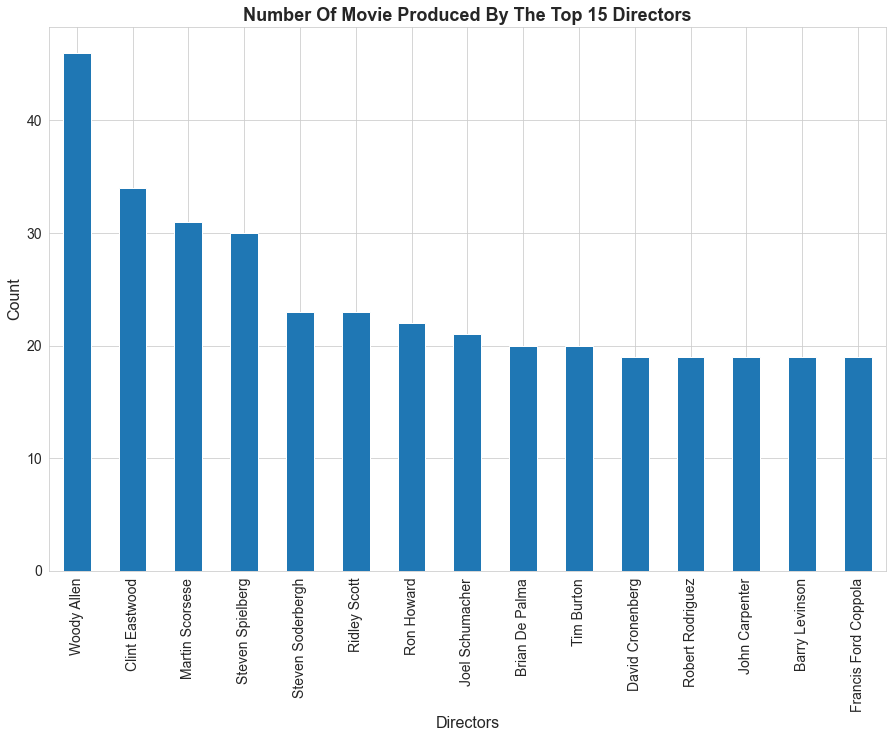

In [67]:
director_count = column_count(clean_df, 'director')

director_count.iloc[:15].plot(kind='bar', fontsize=14, figsize=(15,10))
title = 'Number Of Movie Produced By The Top 15 Directors'
xlabel = 'Directors'
ylabel = 'Count'
sns.set_style('whitegrid')
plt.title(title, fontsize=18, fontweight='bold')
plt.xlabel(xlabel, fontsize=16)
plt.ylabel(ylabel, fontsize=16);

##### This graph shows the top fifteen most poductive directors and how many movies each one has made.

### To calculate directors with the most profit we need to repeat the steps made for actors

In [68]:
#two new dataframe for profit and the director count
directors = column_count(clean_df, 'director')
director = list(map(str, (clean_df.director)))
directors_list = directors.index.to_list()
directors_list.append('nan')
profit = np.array(clean_df.profit)

#create two dataframe profit_df and directors_df
profit_df = pd.DataFrame(index=directors_list, columns=['Average Profit'])
directors_df = pd.DataFrame(index=directors_list, columns=['Average Profit'])
profit_df.fillna(value=0.0, inplace=True)
directors_df.fillna(value=0.0, inplace=True)

#assigning the value to each director in each data frame using a loop
y=0
for dirc in director:
    split_cast = list(map(str, dirc.split('|')))
    profit_df.loc[split_cast] = profit_df.loc[split_cast] + profit[y]
    directors_df.loc[split_cast] = directors_df.loc[split_cast] + 1
    y+=1

#dividing to get average profit per director.
profit_director_df = profit_df.divide(directors_df)
profit_director_df.sort_values(by='Average Profit', ascending=False, inplace=True)

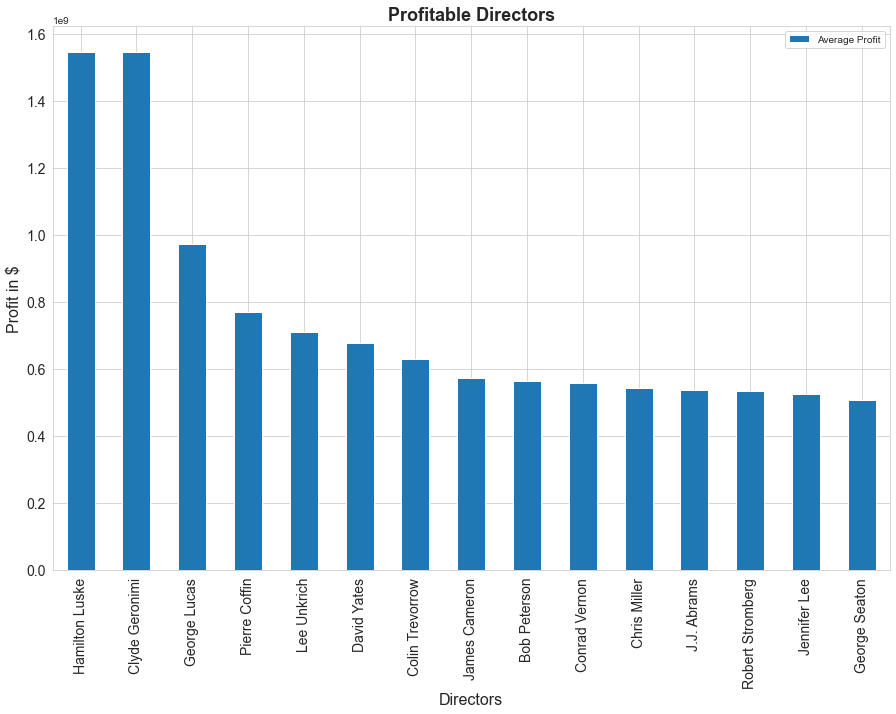

In [69]:
plot_over_yr(profit_director_df.iloc[:15], 'Profitable Directors', 'Directors', 'Profit in $')

##### This graph shows the top fifteen most profitable directors and how much money each one made.

<a id='Q5'></a>
## Q5 : Which production company produced the most movies? and which one is the most profitable?

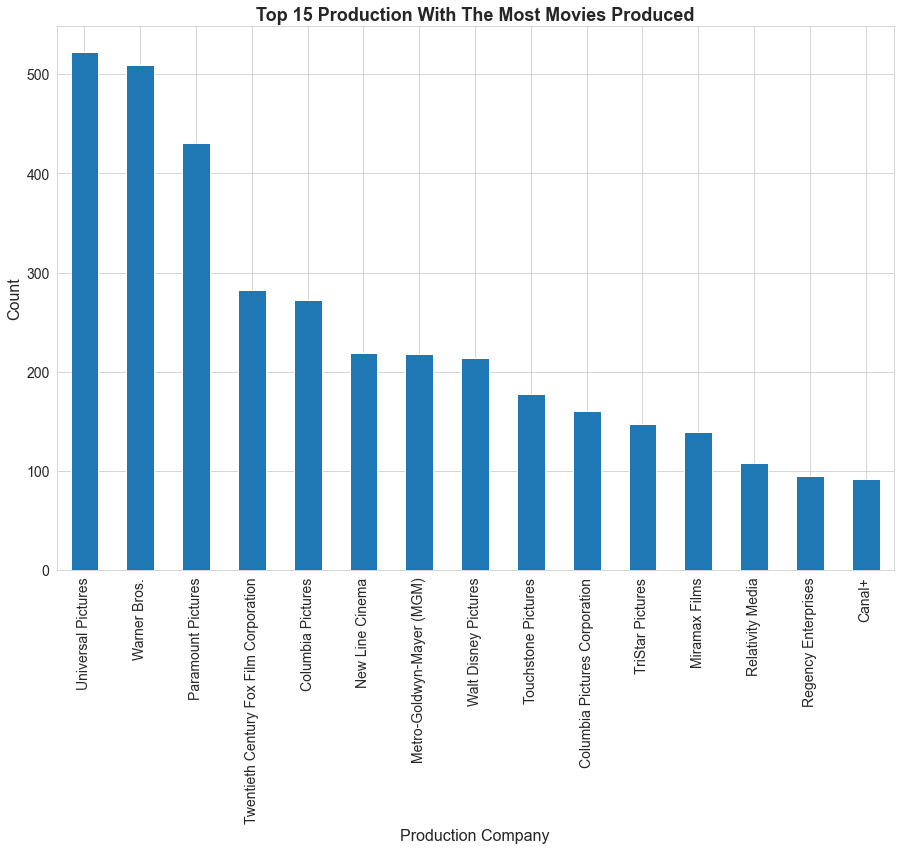

In [70]:
prod_count = column_count(clean_df, 'production_companies')

prod_count.iloc[:15].plot(kind='bar', fontsize=14, figsize=(15,10))
title = 'Top 15 Production With The Most Movies Produced'
xlabel = 'Production Company'
ylabel = 'Count'
sns.set_style('whitegrid')
plt.title(title, fontsize=18, fontweight='bold')
plt.xlabel(xlabel, fontsize=16)
plt.ylabel(ylabel, fontsize=16);

##### This graph shows the top fifteen production companies based on number of movies produced.

In [71]:
#a new dataframe for company count
companies = column_count(clean_df, 'production_companies')
company = list(map(str, (clean_df['production_companies'])))
company_list = companies.index.to_list()
company_list.append('nan')
profit = np.array(clean_df.profit)

#create a dataframe company_df and fill with 0.0 values
company_df = pd.DataFrame(index=company_list, columns=['Total Profit'])
company_df.fillna(value=0.0, inplace=True)

#assigning the value to each company in the dataframe using a loop
y=0
for comp in company:
    split_comp = list(map(str, comp.split('|')))
    company_df.loc[split_comp] = company_df.loc[split_comp] + profit[y]
    y+=1

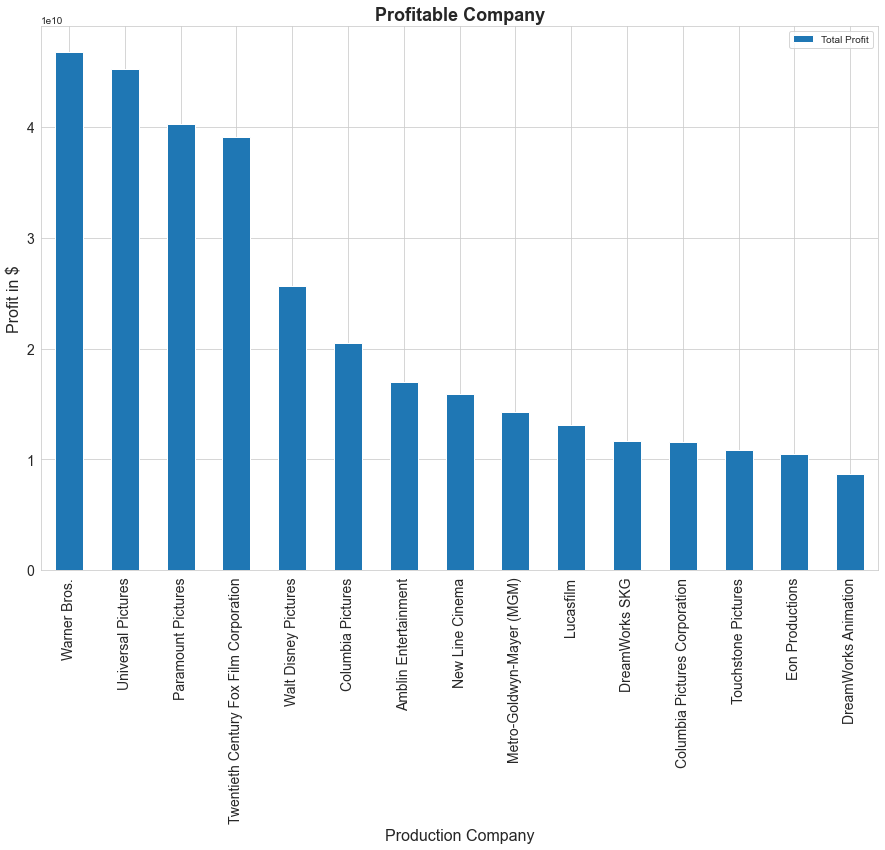

In [72]:
company_df.sort_values(by='Total Profit', ascending=False, inplace=True)
plot_over_yr(company_df.iloc[:15], 'Profitable Company', 'Production Company', 'Profit in $')

##### This graph shows the top fifteen most profitable production companies and how much money each one made on avarage.

<a id='Q6'></a>
## Q6 : What is the correlation between profit, vote, and popularity?

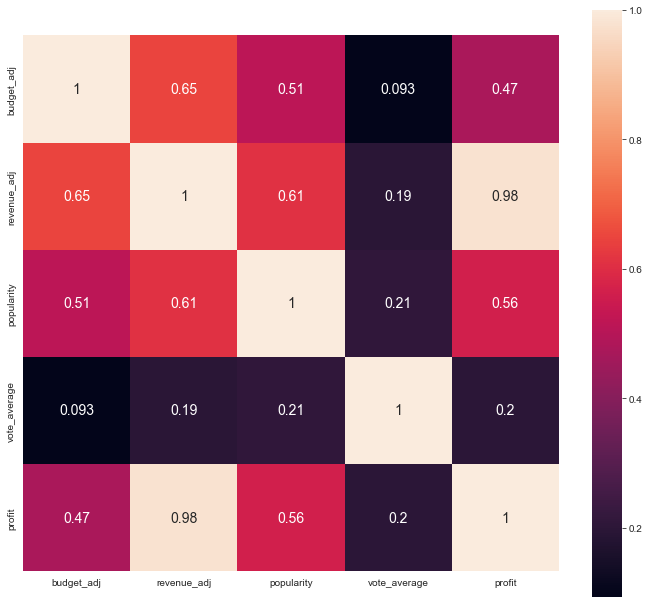

In [73]:
correlation_df = clean_df[['budget_adj','revenue_adj','popularity','vote_average','profit']].corr()
fig, ax = plt.subplots(figsize=(12,12))
_ = sns.heatmap(correlation_df, square=True, cbar_kws={'shrink':.9}, ax=ax, annot=True, annot_kws={'fontsize':14})

<a id='conclusions'></a>
## Conclusions

#### Studing and analyzing this data set had brought me to the following conclusions:
> 1- Movies with genres of 'adventure','action', or 'science fiction' have a higher popularity.<br>
> 2- Movies staring 'Robert MacNaughton','Daisy Ridley', or 'J. Pat O'Malley' have a high profit rate.<br>
> 3- Movies staring 'Robert De Niro','Samuel L. Jackson', or 'Bruce Willis' will be able to sell scince they are the most exprienced actors.<br>
> 4- Movies directed by 'Hamilton Luske','Clyde Geronimi' or 'George Lucas' would probably be more successful.<br>
> 5- Movies produced by 'Warner Bros.','Universal Pictures', or 'Paramount Pictures' would be more successful.<br>
> 6- Movies with higher budget tend to have a higher popularity and a higher profit.<br>
<br>
#### Limitations:
> 1- The vote count column doesn't give an accurate representation of the popularity of a movie, as the vote count varies greatly between movies.<br>
> 2- It would be good to know who the popularity values are calculated and what was the considerations, for more accurate results.<br>